In [10]:
#import pandas lib
import pandas as pd 
from pandas import Series , DataFrame


#import numpy , matplotlic, seaborn lib
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline


#machine learning lib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [11]:
# import files 
train_df = pd.read_csv("train.csv")
test_df = pd. read_csv("test.csv")

In [12]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train_df.info()
print("--------------------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [14]:
#drop some columns, these are won't useful in analysis and prediction
train_df = train_df.drop(['PassengerId','Name','Ticket'],axis = 1)
test_df = test_df.drop(['Name','Ticket'], axis =1 )

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64
2


C:\Users\Sourav Saha\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Sourav Saha\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


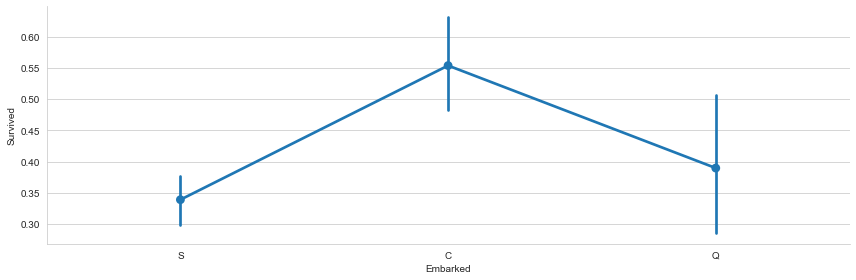

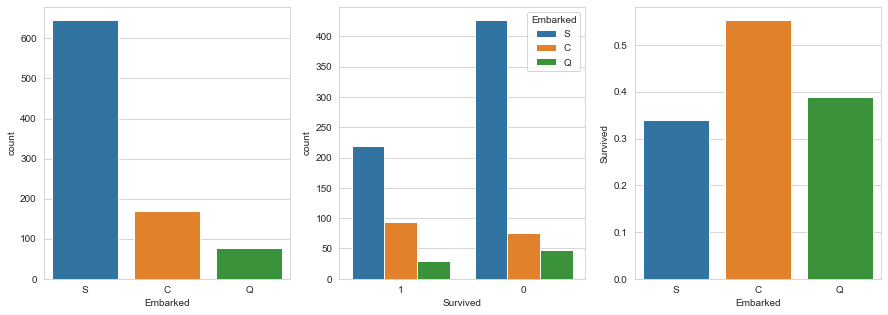

In [15]:
#embarked

print(train_df.groupby(['Embarked'])['Survived'].count())
# here we can see most of the value are filled with  S , so we can fill nan value with S
# lets see about nan value in Embarked column
print(train_df['Embarked'].isna().sum())
# fill thw two missing values with the most occurred vvalue, which is s
train_df['Embarked'] = train_df['Embarked'].fillna("S")

#plot
sns.factorplot('Embarked', 'Survived' ,data = train_df , size =4 , aspect = 3 )
fig , (axis1 , axis2 , axis3) = plt.subplots(1,3,figsize = (15,5))


sns.countplot(x = 'Embarked', data = train_df , ax = axis1)
sns.countplot(x =  'Survived', hue = 'Embarked' , data = train_df , order = [1,0] , ax = axis2  )

#groupby embarked and get the mean for survived passengers for each value in Embarked 
embark_pred = train_df[['Embarked' , 'Survived']] .groupby(['Embarked'], as_index =False).mean()
print(embark_pred.head())
sns.barplot(x = 'Embarked',y = "Survived" , data = embark_pred, order = ['S','C','Q'],ax =axis3 )

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.
embark_dummy_train = pd.get_dummies(train_df['Embarked'])
embark_dummy_test = pd.get_dummies(test_df['Embarked'])

train_df= train_df.join(embark_dummy_train)
test_df = test_df.join(embark_dummy_test)

train_df.drop(["Embarked"], axis =1 , inplace = True)
test_df.drop(["Embarked"], axis =1 , inplace = True)

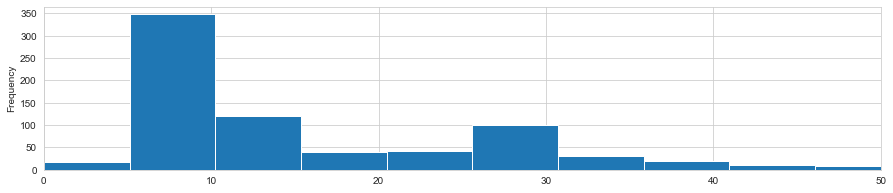

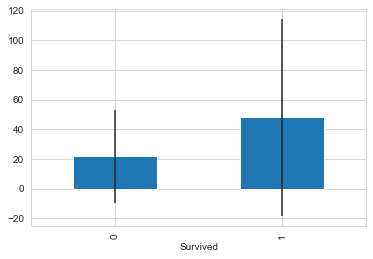

In [16]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
train_df['Fare'] = train_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = train_df["Fare"][train_df["Survived"] == 0]
fare_survived     = train_df["Fare"][train_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
train_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

C:\Users\Sourav Saha\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Sourav Saha\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


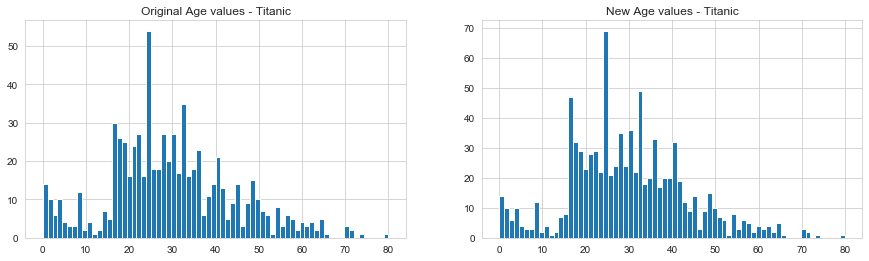

In [17]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = train_df["Age"].mean()
std_age_titanic       = train_df["Age"].std()
count_nan_age_titanic = train_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
train_df["Age"][np.isnan(train_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
train_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

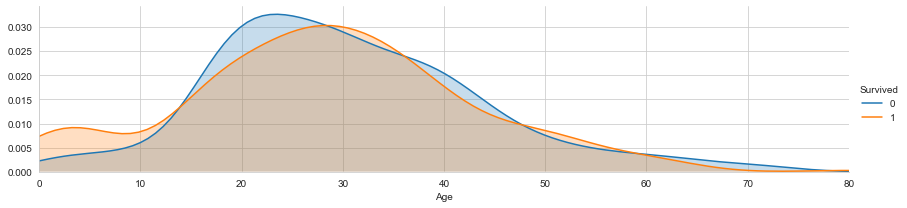

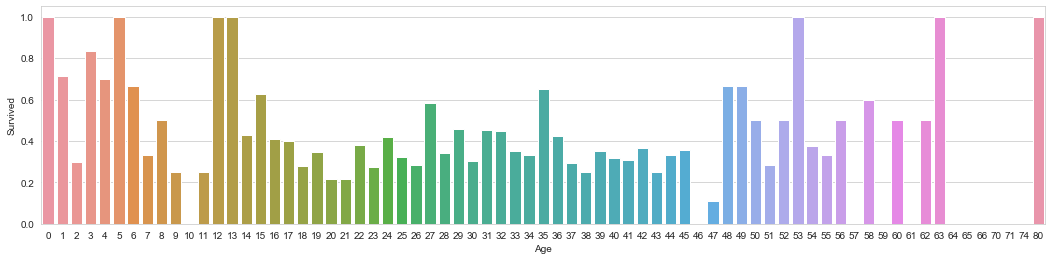

In [18]:


# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)



In [19]:


# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
train_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)



C:\Users\Sourav Saha\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

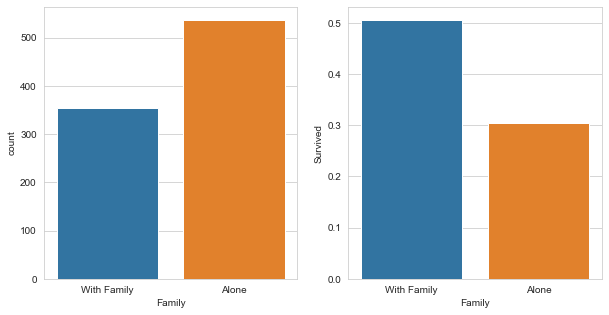

In [20]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
train_df = train_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=train_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [21]:
train_df

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Family
0,0,3,male,22,7,0,0,1,1
1,1,1,female,38,71,1,0,0,1
2,1,3,female,26,7,0,0,1,0
3,1,1,female,35,53,0,0,1,1
4,0,3,male,35,8,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,13,0,0,1,0
887,1,1,female,19,30,0,0,1,0
888,0,3,female,33,23,0,0,1,1
889,1,1,male,26,30,1,0,0,0


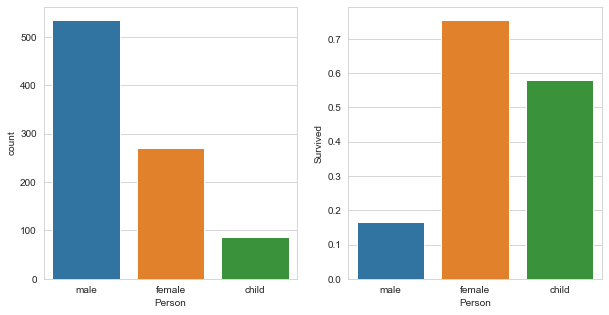

In [22]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
train_df['Person'] = train_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)


# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_train  = pd.get_dummies(train_df['Person'])
person_dummies_train.columns = ['Child','Female','Male']
person_dummies_train.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train_df = train_df.join(person_dummies_train)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

C:\Users\Sourav Saha\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Sourav Saha\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


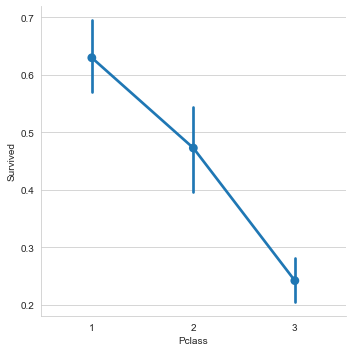

In [23]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(train_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

train_df = train_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [24]:
test_df

,PassengerId,Sex,Age,Fare,C,Q,S,Family,Child,Female,Class_1,Class_2
0,892,male,34,7,0,1,0,0,0,0,0,0
1,893,female,47,7,0,0,1,1,0,1,0,0
2,894,male,62,9,0,1,0,0,0,0,0,1
3,895,male,27,8,0,0,1,0,0,0,0,0
4,896,female,22,12,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,male,22,8,0,0,1,0,0,0,0,0
414,1306,female,39,108,1,0,0,0,0,1,1,0
415,1307,male,38,7,0,0,1,0,0,0,0,0
416,1308,male,17,8,0,0,1,0,0,0,0,0


In [25]:
train_df.drop("Sex",axis =1,inplace=True)




In [26]:
test_df.drop("Sex",axis =1,inplace=True)

In [27]:
X_train = train_df.drop("Survived",axis =1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis =1) 

In [28]:
X_test

,Age,Fare,C,Q,S,Family,Child,Female,Class_1,Class_2
0,34,7,0,1,0,0,0,0,0,0
1,47,7,0,0,1,1,0,1,0,0
2,62,9,0,1,0,0,0,0,0,1
3,27,8,0,0,1,0,0,0,0,0
4,22,12,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,22,8,0,0,1,0,0,0,0,0
414,39,108,1,0,0,0,0,1,1,0
415,38,7,0,0,1,0,0,0,0,0
416,17,8,0,0,1,0,0,0,0,0


# Decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [42]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 1]


In [30]:
# Random forest 
model = LogisticRegression()
model.fit(X_train,Y_train)
#Y_pred = model.predict(X_train)
#from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
#print(classification_report(Y_train,Y_pred))

C:\Users\Sourav Saha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

(418, 2)
Saved file: gender_submission.csv


In [32]:
# Support Vector matrics
model = SVC()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
print(model.score(X_train, Y_train))
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
print(classification_report(Y_train,Y_pred))

0.6812570145903479
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       549
           1       0.69      0.31      0.43       342

    accuracy                           0.68       891
   macro avg       0.68      0.61      0.60       891
weighted avg       0.68      0.68      0.64       891



In [33]:
#Logistic Regression
#from sklearn.model_selection import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
model.score(X_train, Y_train)
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
print(classification_report(Y_train,Y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85       549
           1       0.76      0.72      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



C:\Users\Sourav Saha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(Y_train, Y_pred)
roc_auc = auc(Y_train,Y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

ValueError: x is neither increasing nor decreasing : [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1
 0 1 0].

In [79]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
model.score(X_train, Y_train)

0.7800224466891134

In [80]:
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
print(classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       549
           1       0.75      0.64      0.69       342

    accuracy                           0.78       891
   macro avg       0.77      0.75      0.76       891
weighted avg       0.78      0.78      0.78       891



In [81]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(X_train, Y_pred).ravel()
(tn, fp, fn, tp)


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets